# Модуль 3. Класичне машинне навчання

## Imports and EDA

In [318]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
df = pd.read_csv('Housing.csv')

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [321]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


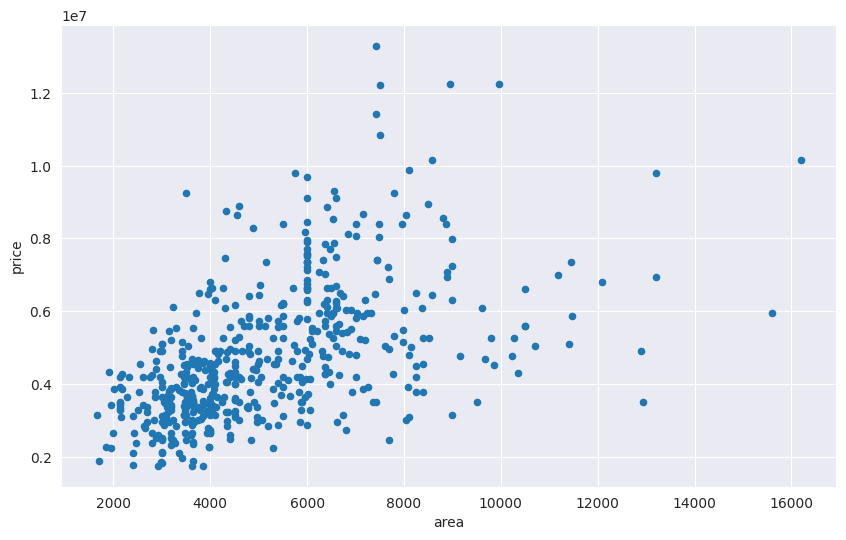

In [322]:
df.plot(x = 'area',
        y = 'price',
        kind = 'scatter',
        figsize = (10,6),
        grid = True)
plt.show()

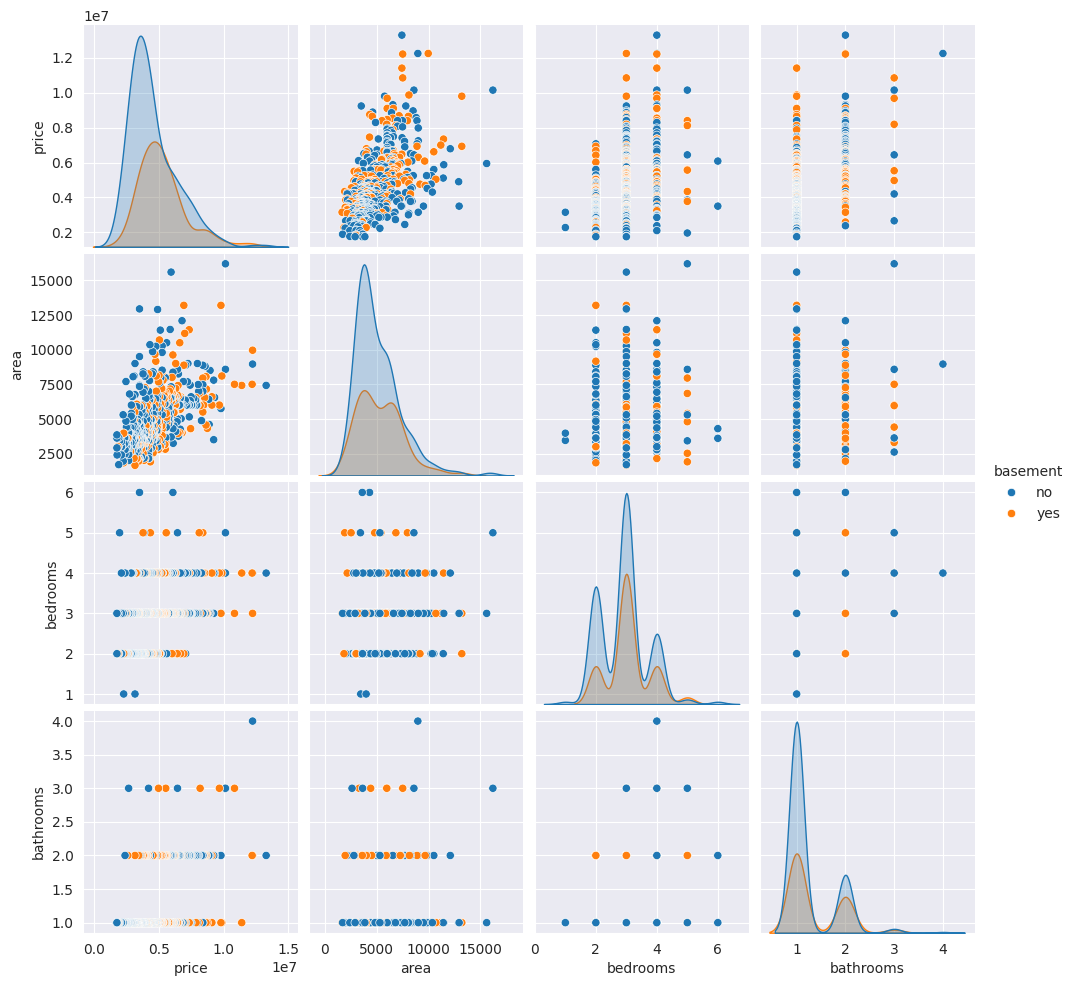

In [323]:
sns.set_style('darkgrid')
important_features = ['price', 'area', 'bedrooms', 'bathrooms']
sns.pairplot(df,
             vars = important_features,
             hue = 'basement')
plt.show()

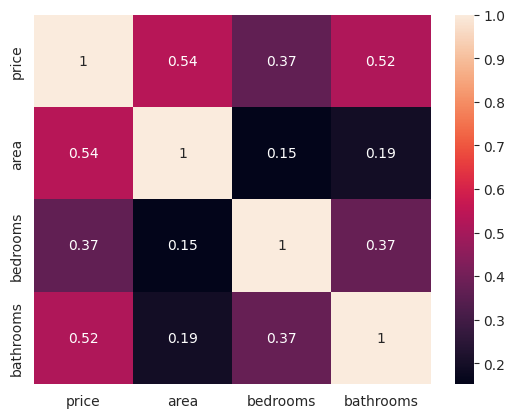

In [324]:
df_corr = df[important_features].corr()
sns.heatmap(df_corr, annot = True)
plt.show()

## напишіть функцію гіпотези лінійної регресії у векторному вигляді

In [325]:
# Function for Linear Regression Hypothesis
def h(X, w):
    return np.dot(X, w)

## створіть функцію для обчислення функції втрат у векторному вигляді

In [326]:
# Loss Function
def loss_func(X, y, w):
    return np.square(h(X, w) - y).sum() / (2 * len(X))

## реалізуйте один крок градієнтного спуску

In [327]:
# Gradient Descent Step
def grad_step(X, y, w, learning_rate):
    m = len(y)
    grad = (X.T @ (h(X, w) - y)) / m
    w -= learning_rate * grad
    return w

In [328]:
# Finding Optimal Parameters (w) using Gradient Descent
def gradient(X, y, learning_rate, num_iter, eps):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))

    w = np.zeros(X.shape[1])

    loss = loss_func(X, y, w)
    loss_history = [loss]

    for _ in range(num_iter):
        w = grad_step(X, y, w, learning_rate)

        loss = loss_func(X, y, w)
        if abs(loss - loss_history[-1]) < eps:
            loss_history.append(loss)
            break

        loss_history.append(loss)

    return w, loss_history

## знайдіть найкращі параметри для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень

In [329]:
# Normalisation
columns = important_features
norm_df = df.copy()
for column in columns[1:]:
    norm_df[column] = (df[column] - df[column].mean()) / df[column].std()

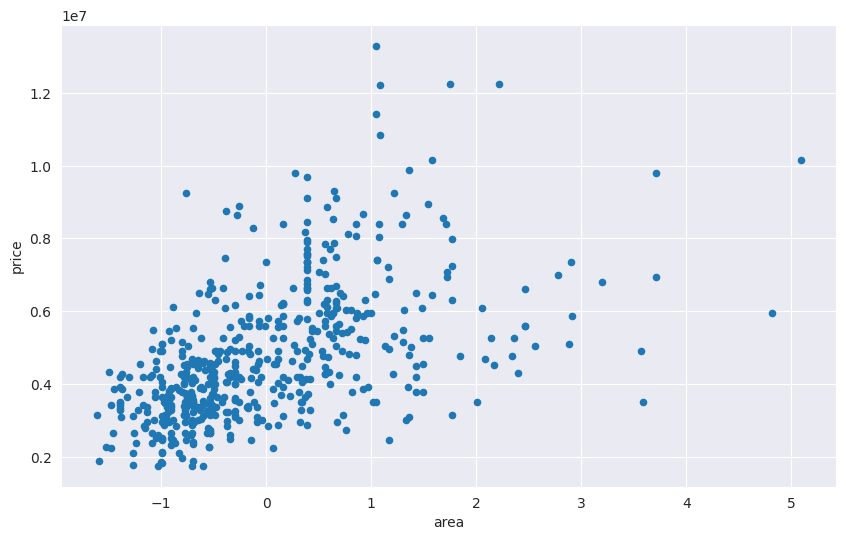

In [330]:
# Data after nomalisation
norm_df.plot(x = 'area',
        y = 'price',
        kind = 'scatter',
        figsize = (10,6),
        grid = True)
plt.show()

In [331]:
X = norm_df[['area', 'bedrooms', 'bathrooms']].values
y = norm_df['price'].values

In [332]:
learning_rate = 0.0001
num_iter = 1_000_000
eps = 1e-8

In [333]:
# Gradient descent Solution
w_gradient, loss_history = gradient(X, y, learning_rate, num_iter, eps)
print(f'Gradient descent - (w): {w_gradient}')

Gradient descent - (w): [4766729.16403196  821968.85731428  300261.43519378  696445.37951083]


In [334]:
# Finding Optimal Parameters (w) using Analytical Solution
import matplotlib.pyplot as plt
ones = np.ones((X.shape[0], 1))
X = np.hstack((ones, X))
w_analytical = np.linalg.pinv(X.T @ X) @ X.T @ y
print(f'Analytical solution (w): {w_analytical}')



Analytical solution (w): [4766729.24770642  821968.58935343  300259.16468032  696447.75898579]


In [335]:
# Calculate the difference
difference = np.abs(w_gradient - w_analytical)
percentage_difference = (difference / np.abs(w_analytical)) * 100
mean_difference = np.mean(percentage_difference)
std_difference = np.std(percentage_difference)

In [336]:
# plt.plot(difference)
# plt.xlabel("Feature Index")
# plt.ylabel("Absolute Difference")
# plt.title("Absolute Difference between Gradient Descent and Analytical Solution")
# plt.show()

In [337]:
# Results
print(f'Absolute difference:   {difference}')
print(f'Percentage difference: {percentage_difference} %')
print(f'Mean percentage difference: {mean_difference:.4f} %')
print(f'Standard deviation:         {std_difference:.4f} %')
(print)

#Compare results
if np.all(percentage_difference < 0.001):
  print('The results are very similar. Gradient descent seems to be well.')
elif np.all(percentage_difference < 0.01):
  print('The results are somewhat similar. While there are minor differences, they might be acceptable.')
else:
  print(f'The results are not very similar (average difference: {mean_difference} %, standard deviation: {std_difference} %) . This might indicate issues with gradient descent.')


Absolute difference:   [0.08367446 0.26796085 2.27051346 2.37947496]
Percentage difference: [1.75538528e-06 3.25998892e-05 7.56184566e-04 3.41658786e-04] %
Mean percentage difference: 0.0003 %
Standard deviation:         0.0003 %
The results are very similar. Gradient descent seems to be well.
